In [19]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator as kmf
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import matplotlib.patches as mpatches

In [20]:
selected_cell = 'Hepatocytes'

In [21]:
svr_estimation = pd.read_csv('TCGA-LIHC.Mesenchyme.csv',index_col=0)
svr_estimation.head()

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE
Mixture,,,,,,,,,,
TCGA-FV-A495-01,0.443809,0.261241,0.083257,0.016736,0.040656,0.147452,0.006849,0,0.956110,0.378415
TCGA-G3-A3CH-11,0.305872,0.525305,0.017091,0.026283,0.069102,0.006428,0.049920,0,0.972299,0.490151
TCGA-CC-A3MB-01,0.540845,0.180801,0.060513,0.000000,0.097361,0.000000,0.120480,0,0.940356,0.542547
TCGA-BC-A3KF-01,0.648937,0.242699,0.000000,0.016786,0.000000,0.032126,0.059452,0,0.948020,0.413964
TCGA-DD-A4NV-01,0.346874,0.353283,0.000000,0.056060,0.064966,0.122436,0.056381,0,0.925465,0.382281


In [22]:
sample_list = [sample for sample in svr_estimation.index.values if '-01' in sample]
svr_estimation = svr_estimation.reindex(sample_list)

In [23]:
survival_data = pd.read_csv('survival_LIHC_survival.txt',index_col=0,delimiter='\t')
sample_list = [sample for sample in survival_data.index.values if '-01' in sample]
survival_data = survival_data.reindex(sample_list)
survival_data.head()

,_PATIENT,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
sample,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S,0,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,1,724.0,1.0,724.0,1.0,102.0,1,102.0,NaN
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,1,1624.0,1.0,1624.0,1.0,1083.0,1,1083.0,NaN
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,0,1939.0,0.0,1939.0,0.0,1939.0,0,1939.0,NaN
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,1,2532.0,1.0,2532.0,0.0,2532.0,1,1745.0,NaN


In [24]:
dfs_data = survival_data.filter(['DFI.time', 'DFI'])
dfs_data = dfs_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
dfs_data['DFS_E'] = [binary[event] for event in dfs_data['DFI']]
dfs_data['DFS_T'] = [time/30 for time in dfs_data['DFI.time']]
dfs_data.head()

,DFI.time,DFI,DFS_E,DFS_T
sample,,,,
TCGA-2Y-A9GS-01,102.0,1.0,True,3.400000
TCGA-2Y-A9GT-01,1083.0,1.0,True,36.100000
TCGA-2Y-A9GU-01,1939.0,0.0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,0.0,False,84.400000
TCGA-2Y-A9GW-01,1229.0,1.0,True,40.966667


In [25]:
survival_test = svr_estimation.merge(dfs_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-FV-A495-01,0.443809,0.261241,0.083257,0.016736,0.040656,0.147452,0.006849,0,0.956110,0.378415,1.0,0.0,False,0.033333
TCGA-CC-A3MB-01,0.540845,0.180801,0.060513,0.000000,0.097361,0.000000,0.120480,0,0.940356,0.542547,315.0,0.0,False,10.500000
TCGA-BC-A3KF-01,0.648937,0.242699,0.000000,0.016786,0.000000,0.032126,0.059452,0,0.948020,0.413964,8.0,0.0,False,0.266667
TCGA-DD-A4NV-01,0.346874,0.353283,0.000000,0.056060,0.064966,0.122436,0.056381,0,0.925465,0.382281,2398.0,0.0,False,79.933333
TCGA-BD-A3EP-01,0.596204,0.121961,0.028220,0.035394,0.057758,0.117437,0.043027,0,0.585677,0.838098,409.0,0.0,False,13.633333


In [26]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-DD-A3A2-01,0.296332,0.550616,0.039973,0.044422,0.021148,0.005303,0.042206,0,0.940322,0.628012,2131.0,0.0,False,71.033333
TCGA-DD-A4NI-01,0.282497,0.522145,0.027762,0.038263,0.036128,0.026420,0.066784,0,0.967654,0.494728,816.0,0.0,False,27.200000
TCGA-G3-A5SK-01,0.326794,0.492863,0.000000,0.041476,0.055811,0.000000,0.083056,0,0.970081,0.425642,483.0,1.0,True,16.100000
TCGA-WX-AA46-01,0.289279,0.471206,0.022054,0.075200,0.079134,0.023563,0.039563,0,0.962121,0.404964,756.0,0.0,False,25.200000
TCGA-2Y-A9GT-01,0.343320,0.463614,0.030410,0.031397,0.028935,0.050171,0.052153,0,0.970112,0.367083,1083.0,1.0,True,36.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DD-AAD5-01,0.812328,0.000000,0.056138,0.001035,0.012549,0.056858,0.061093,0,0.609412,0.921454,130.0,1.0,True,4.333333
TCGA-DD-A3A6-01,0.396473,0.000000,0.030353,0.088031,0.112689,0.264618,0.107835,0,0.368479,0.968552,3258.0,0.0,False,108.600000
TCGA-CC-A9FV-01,0.554518,0.000000,0.017659,0.076945,0.164886,0.084080,0.101913,0,0.442071,0.956760,0.0,0.0,False,0.000000
TCGA-ED-A82E-01,0.435781,0.000000,0.043389,0.019493,0.007240,0.338758,0.155338,0,0.191678,0.985895,408.0,0.0,False,13.600000


In [27]:
E = list(survival_reorder['DFS_E'])
mid_point = int(len(E)/2)
E_high = E[:mid_point]
E_low = E[mid_point:]
S = list(survival_reorder['DFS_T'])
S_high = S[:mid_point]
S_low = S[mid_point:]

In [28]:
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,4)
p

0.0126

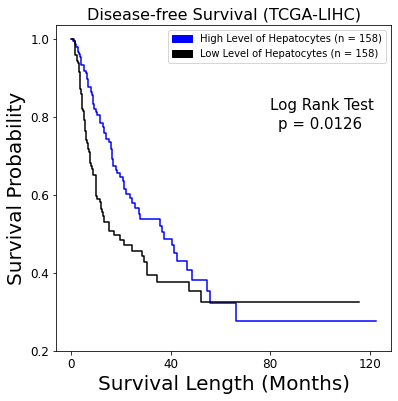

In [38]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='b')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0.2,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='b',label='High Level of %s (n = %s)'%(selected_cell,len(E_high)))
low_patch = mpatches.Patch(color='k',label='Low Level of %s (n = %s)'%(selected_cell,len(E_low)))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.77, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Disease-free Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.DFS.pdf'%selected_cell,format='pdf')

In [39]:
os_data = survival_data.filter(['OS.time', 'OS'])
os_data = os_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
os_data['OS_E'] = [binary[event] for event in os_data['OS']]
os_data['OS_T'] = [time/30 for time in os_data['OS.time']]
os_data.head()

,OS.time,OS,OS_E,OS_T
sample,,,,
TCGA-2Y-A9GS-01,724.0,1,True,24.133333
TCGA-2Y-A9GT-01,1624.0,1,True,54.133333
TCGA-2Y-A9GU-01,1939.0,0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,1,True,84.400000
TCGA-2Y-A9GW-01,1271.0,1,True,42.366667


In [40]:
survival_test = svr_estimation.merge(os_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-FV-A495-01,0.443809,0.261241,0.083257,0.016736,0.040656,0.147452,0.006849,0,0.956110,0.378415,1.0,0,False,0.033333
TCGA-CC-A3MB-01,0.540845,0.180801,0.060513,0.000000,0.097361,0.000000,0.120480,0,0.940356,0.542547,315.0,1,True,10.500000
TCGA-BC-A3KF-01,0.648937,0.242699,0.000000,0.016786,0.000000,0.032126,0.059452,0,0.948020,0.413964,8.0,0,False,0.266667
TCGA-DD-A4NV-01,0.346874,0.353283,0.000000,0.056060,0.064966,0.122436,0.056381,0,0.925465,0.382281,2398.0,0,False,79.933333
TCGA-CC-A1HT-01,0.602426,0.000000,0.127597,0.014010,0.029641,0.192867,0.033458,0,0.701488,0.921574,101.0,1,True,3.366667


In [41]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-DD-A3A2-01,0.296332,0.550616,0.039973,0.044422,0.021148,0.005303,0.042206,0,0.940322,0.628012,2131.0,1,True,71.033333
TCGA-DD-A4NI-01,0.282497,0.522145,0.027762,0.038263,0.036128,0.026420,0.066784,0,0.967654,0.494728,816.0,0,False,27.200000
TCGA-G3-A5SK-01,0.326794,0.492863,0.000000,0.041476,0.055811,0.000000,0.083056,0,0.970081,0.425642,744.0,0,False,24.800000
TCGA-WX-AA46-01,0.289279,0.471206,0.022054,0.075200,0.079134,0.023563,0.039563,0,0.962121,0.404964,756.0,0,False,25.200000
TCGA-2Y-A9GT-01,0.343320,0.463614,0.030410,0.031397,0.028935,0.050171,0.052153,0,0.970112,0.367083,1624.0,1,True,54.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CC-A9FV-01,0.554518,0.000000,0.017659,0.076945,0.164886,0.084080,0.101913,0,0.442071,0.956760,0.0,0,False,0.000000
TCGA-CC-A3M9-01,0.509329,0.000000,0.144468,0.000000,0.000000,0.272052,0.074151,0,0.604876,0.938293,300.0,1,True,10.000000
TCGA-DD-AAD5-01,0.812328,0.000000,0.056138,0.001035,0.012549,0.056858,0.061093,0,0.609412,0.921454,1345.0,0,False,44.833333
TCGA-CC-A7II-01,0.474034,0.000000,0.249325,0.014841,0.047031,0.155973,0.058796,0,0.255960,0.978376,399.0,0,False,13.300000


In [42]:
E = list(survival_reorder['OS_E'])
mid_point = int(len(E)/2)
E_high = E[:mid_point]
E_low = E[mid_point:]

In [43]:
S = list(survival_reorder['OS_T'])
S_high = S[:mid_point]
S_low = S[mid_point:]

In [44]:
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,4)
p

0.0009

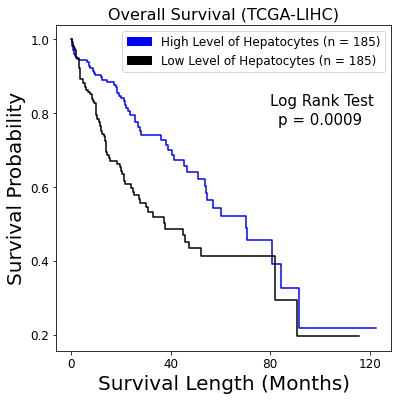

In [48]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='b')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0.2,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='b',label='High Level of %s (n = %s)'%(selected_cell,len(E_high)))
low_patch = mpatches.Patch(color='k',label='Low Level of %s (n = %s)'%(selected_cell,len(E_low)))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.77, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=12)
plt.title('Overall Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.OS.pdf'%selected_cell,format='pdf')